In [30]:
import numpy as np
import os

from PIL import Image
from io import BytesIO
import boto3

from tensorflow.keras.models import load_model

# load xception model

In [10]:
load_xception = load_model('models/transfer_test.hdf5')

# load test image

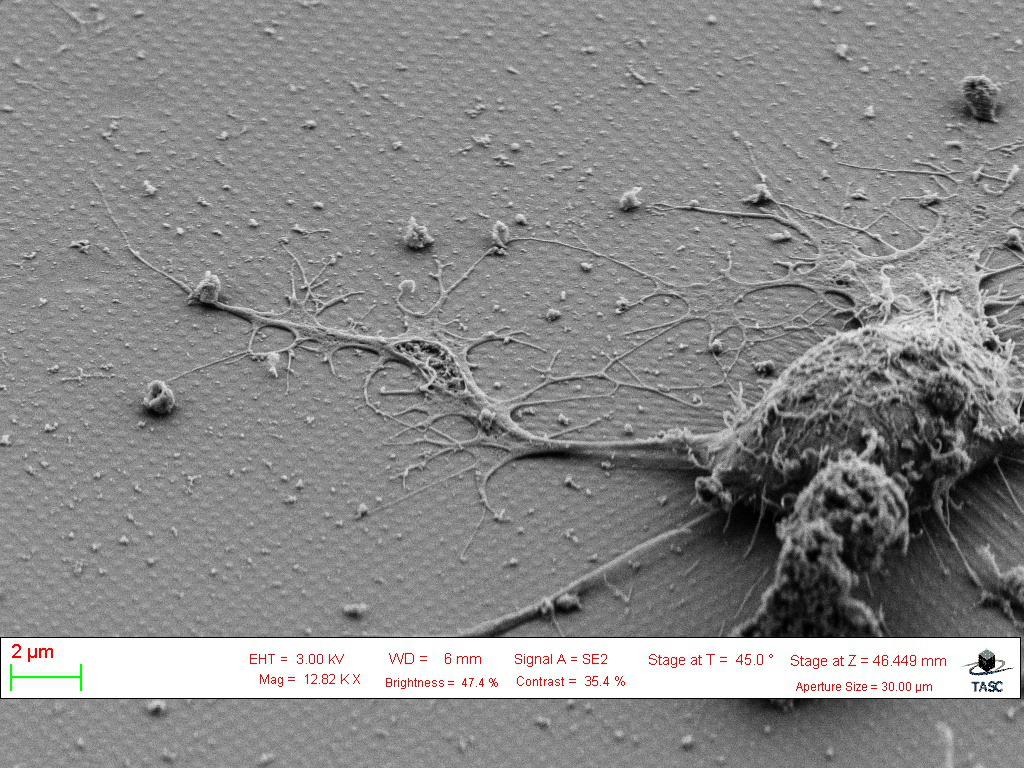

In [24]:
s3 = boto3.client('s3')
bucket = 'nano-materials'

# grab  biologcal image 4
obj = s3.get_object(Bucket=bucket, Key=f'data-raw/Biological/L7_f69fb61d56c3baec5094bd32264aad2c.jpg')
img_bytes = BytesIO(obj['Body'].read())
biological4 = Image.open(img_bytes)

#img_path='data/holdout/Biological/L7_199e5c7bf53e696cef89b6a6d35f1911.jpg'
biological4

In [25]:
def predict(filepath):
    img = Image.open(filepath)
    img_rs = np.array(img.resize((299,299)))/255
    prediction = load_xception.predict(img_rs.reshape(1,299,299,3))
    return np.round(prediction * 100, 1)

In [26]:
preds=predict(img_bytes)
preds

array([[98.1,  0. ,  0. ,  0.2,  0.4,  0.1,  0.4,  0. ,  0. ,  0.8]],
      dtype=float32)

In [27]:
pred_proba = "{:.1f}".format(np.amax(preds)) 
pred_proba

'98.1'

In [23]:
class_names = ['Biological', 'Fibres', 'Films_Coated_Surface', 'MEMS_devices_and_electrodes', 'Nanowires', 'Particles', 'Patterned_surface', 'Porous_Sponge', 'Powder', 'Tips']

top_choice_index = preds.argsort()[0][::-1][0] # sort in reverse order and return top index
best_match = class_names[top_choice_index]
best_match

'Biological'

# Xception model summary

In [28]:
load_xception.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________